In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure preliminaries notebook

The aim of this notebook is just to collect together the relevant data into a single dataframe to speed up plotting in the other notebooks. 

The notebook loads the traces and creates a dataframe for each, before concatenating these dataframes, storing plotting information (colour, marker style) and pickling the result. This can then be loaded in the other notebooks.

In [2]:
reload(helpers)

num_samples = 1000

## Make list of traces and filenames
tracelist = glob.glob('traces/*trace.p')
filenamelist = []
for trace in tracelist:
    filename = trace.split('/')[0]+'/'+trace.split('/')[1].replace('trace', 'filenames')
    filenamelist.append(filename)
    
## Build dataframe of posterior means
thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']
dfs = []
indiv_dict = {}
group_dict = {}
for i, tracename in enumerate(tracelist):
    print 'Loading traces for %s' %(tracename)
    trace = pickle.load(open(tracename, 'rb'))
    subjs = pickle.load(open(filenamelist[i], 'rb'))
    
    df = helpers.make_single_pm_df(trace, subjs, thetas)
    
    indiv_dict = helpers.add_post_sample_dict(indiv_dict,
                                             trace,
                                             subjs,
                                             thetas,
                                             num_samples=num_samples)
    
    group_dict = helpers.add_group_post_dict(group_dict,
                                             trace,
                                             tracename,
                                             num_samples=num_samples)
    dfs.append(df)

Loading traces for traces/LiCl_32.0_R_L_trace.p
Loading traces for traces/PYY_1.5_A_D_trace.p
Loading traces for traces/sib_0.9_A_D_trace.p
Loading traces for traces/PYY_7.5_R_L_trace.p
Loading traces for traces/LiCl_64.0_R_L_trace.p
Loading traces for traces/GLP-1_100.0_A_D_trace.p
Loading traces for traces/saline_0.0_A_L_trace.p
Loading traces for traces/saline_0.0_R_D_trace.p
Loading traces for traces/Ex-4_0.3_A_D_trace.p
Loading traces for traces/vehicle_0.0_A_D_trace.p
Loading traces for traces/PYY_300.0_A_D_trace.p
Loading traces for traces/GLP-1_30.0_A_D_trace.p
Loading traces for traces/saline_0.0_A_D_trace.p
Loading traces for traces/Lep_2.0_A_D_trace.p
Loading traces for traces/LiCl_32.0_A_D_trace.p
Loading traces for traces/PYY_1.5_R_L_trace.p
Loading traces for traces/PYY_7.5_A_D_trace.p
Loading traces for traces/GLP-1_300.0_A_D_trace.p
Loading traces for traces/PYY_300.0_R_L_trace.p
Loading traces for traces/saline_0.0_R_L_trace.p


In [3]:
## Concatenate dataframes
full_df = pd.concat(dfs, ignore_index=True)

## Convert to numeric dtype
to_convert = thetas + ['dose', 'id', 'duration', 'rate']
full_df[to_convert] = full_df[to_convert].apply(pd.to_numeric)

## Store marker colour for drugs
def get_drug_colour(row):
    data = [row['drug'], row['dose'], row['adlib'], row['period']]
    return helpers.get_colour(data)
    
full_df['drug_c'] = full_df.apply(get_drug_colour, axis=1)

## Store marker colour for normalised intake
ratemin = full_df['rate'].min()
ratemax = full_df['rate'].max()

rate_norm = mpl.colors.Normalize(vmin = ratemin,
                                 vmax = ratemax)

cmap = cm.ScalarMappable(norm=rate_norm, cmap=cm.plasma)

def get_rate_colour(row):
    return cmap.to_rgba(row['rate'])

full_df['rate_c'] = full_df.apply(get_rate_colour, axis=1)

## Store marker style
def get_ms(row):
    if row['period'] == 'D':
        return '^'
    
    else:
        return 'o'
    
full_df['ms'] = full_df.apply(get_ms, axis=1)

In [4]:
## Pickle the result
pickle.dump(full_df, open('pm_df.p', 'wb'))
pickle.dump(indiv_dict, open('indiv_dict.p', 'wb'))
pickle.dump(group_dict, open('group_dict.p', 'wb'))

## Verify the sample dictionary represents the full posterior well

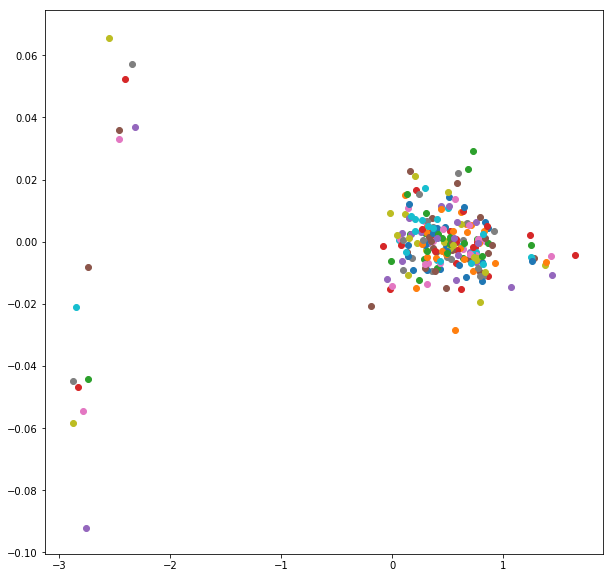

In [5]:
reload(plots)
reload(helpers)

thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']
plots.compare_sample(full_df, indiv_dict, thetas, 7)
plt.show()

In [6]:
print data_dict[data_dict.keys()[0]].shape

NameError: name 'data_dict' is not defined

In [ ]:
reload(helpers)

data_dict = {}
data_dict = helpers.add_group_post_dict(data_dict, trace, tracename)
print data_dict.keys()